# Criação Dataset de exemplo

In [54]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Função para aumentar os valores ao longo do tempo
def increase_over_time(initial_value, rate, years_passed):
    return initial_value * (1 + rate * years_passed)

# Configurações iniciais
np.random.seed(42)
num_rows = 10000
data_inicial = datetime(1950, 1, 1)
data_hora = [data_inicial + timedelta(days=i) for i in range(num_rows)]
years_passed = [(date - data_inicial).days / 365.25 for date in data_hora]
anos = [date.year for date in data_hora]

# Definindo as taxas de aumento anuais para cada variável
rate_increase = {
    'pH': 0.005,
    'turbidez': 0.02,
    'oxigenio_dissolvido': 0.01,
    'nitrogenio': 0.03,
    'fosforo': 0.04,
    'salinidade': 0.01,
    'temperatura': 0.02,
    'temperatura_ar': 0.01,
    'precipitacao': 0.03,
    'vento': 0.01
}

# Criando os dados
data = {
    'pH': [increase_over_time(np.random.uniform(6, 7), rate_increase['pH'], years) for years in years_passed],
    'turbidez': [increase_over_time(np.random.uniform(0, 5), rate_increase['turbidez'], years) for years in years_passed],
    'oxigenio_dissolvido': [increase_over_time(np.random.uniform(4, 6), rate_increase['oxigenio_dissolvido'], years) for years in years_passed],
    'nitrogenio': [increase_over_time(np.random.uniform(0, 1), rate_increase['nitrogenio'], years) for years in years_passed],
    'fosforo': [increase_over_time(np.random.uniform(0, 0.1), rate_increase['fosforo'], years) for years in years_passed],
    'salinidade': [increase_over_time(np.random.uniform(30, 32), rate_increase['salinidade'], years) for years in years_passed],
    'temperatura': [increase_over_time(np.random.uniform(15, 17), rate_increase['temperatura'], years) for years in years_passed],
    'latitude': np.random.uniform(-90, 90, num_rows),
    'longitude': np.random.uniform(-180, 180, num_rows),
    'data_hora': data_hora,
    'ano': anos,
    'ambiente_aquatico': np.random.choice(['Mar', 'Lago', 'Rio'], num_rows),
    'temperatura_ar': [increase_over_time(np.random.uniform(10, 15), rate_increase['temperatura_ar'], years) for years in years_passed],
    'precipitacao': [increase_over_time(np.random.uniform(0, 5), rate_increase['precipitacao'], years) for years in years_passed],
    'vento': [increase_over_time(np.random.uniform(0, 2), rate_increase['vento'], years) for years in years_passed],
    'tipo_de_poluentes': np.random.choice(['Óleo', 'Produtos Químicos', 'Microplásticos'], num_rows)
}

# Criando DataFrame
df = pd.DataFrame(data)

# Salvando como CSV
df.to_csv('Dados Monitoramento De Poluentes Marinho.csv', index=False)

# Exibir as primeiras linhas do DataFrame
print(df.head())


         pH  turbidez  oxigenio_dissolvido  nitrogenio   fosforo  salinidade  \
0  6.374540  1.868204             5.459997    0.638145  0.029891   31.694473   
1  6.950809  1.664652             4.369144    0.459330  0.009483   30.989883   
2  6.732178  0.880866             4.693536    0.964657  0.012639   30.392595   
3  6.598929  3.036832             5.326999    0.219032  0.018073   31.475869   
4  6.156356  2.383643             4.964722    0.588050  0.020374   30.840733   

   temperatura   latitude   longitude  data_hora   ano ambiente_aquatico  \
0    16.483110 -82.321002  114.539203 1950-01-01  1950               Rio   
1    16.763122  59.130832 -127.702886 1950-01-02  1950               Mar   
2    15.928104 -45.124635  160.726966 1950-01-03  1950              Lago   
3    15.580917 -38.891274  123.560681 1950-01-04  1950              Lago   
4    15.641118 -49.275850  150.787187 1950-01-05  1950               Mar   

   temperatura_ar  precipitacao     vento  tipo_de_poluentes  

# Modelo utilizando Dataset de exemplo

In [56]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


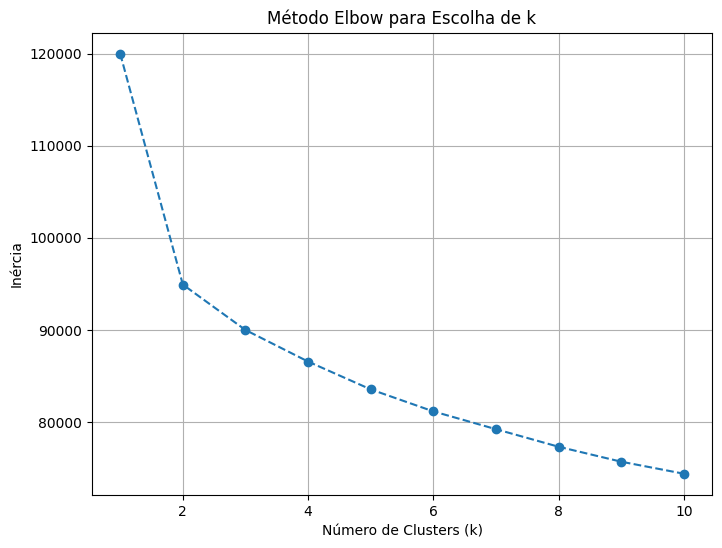

Silhouette Score: 0.07726656405032006
         pH  turbidez  oxigenio_dissolvido  nitrogenio   fosforo  salinidade  \
0  6.374540  1.868204             5.459997    0.638145  0.029891   31.694473   
1  6.950809  1.664652             4.369144    0.459330  0.009483   30.989883   
2  6.732178  0.880866             4.693536    0.964657  0.012639   30.392595   
3  6.598929  3.036832             5.326999    0.219032  0.018073   31.475869   
4  6.156356  2.383643             4.964722    0.588050  0.020374   30.840733   

   temperatura   latitude   longitude   data_hora   ano ambiente_aquatico  \
0    16.483110 -82.321002  114.539203  1950-01-01  1950               Rio   
1    16.763122  59.130832 -127.702886  1950-01-02  1950               Mar   
2    15.928104 -45.124635  160.726966  1950-01-03  1950              Lago   
3    15.580917 -38.891274  123.560681  1950-01-04  1950              Lago   
4    15.641118 -49.275850  150.787187  1950-01-05  1950               Mar   

   temperatura_ar 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carrega o dataset
df = pd.read_csv("Dados Monitoramento De Poluentes Marinho.csv")

# Seleciona as colunas relevantes como features para o agrupamento
features = ['pH', 'turbidez', 'oxigenio_dissolvido', 'nitrogenio', 'fosforo', 'salinidade', 'temperatura', 'latitude', 'longitude', 'temperatura_ar', 'precipitacao', 'vento']

X = df[features]

# Padroniza as features usando StandardScaler para normalizá-las
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar a inércia (soma dos quadrados das distâncias dentro de cada cluster) para diferentes valores de k
inertia = []

# Loop para testar diferentes valores de k (número de clusters) e calcular a inércia para cada k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotagem do gráfico "Elbow" para ajudar na escolha do número ótimo de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow para Escolha de k')
plt.grid(True)
plt.show()

# Após a escolha do número de clusters, aplica o K-Means novamente com k=5 (por exemplo)
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Calcula e exibe o Silhouette Score, uma métrica de qualidade do agrupamento
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Adiciona os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

# Exibe as primeiras linhas do DataFrame com os clusters atribuídos
print(df.head())


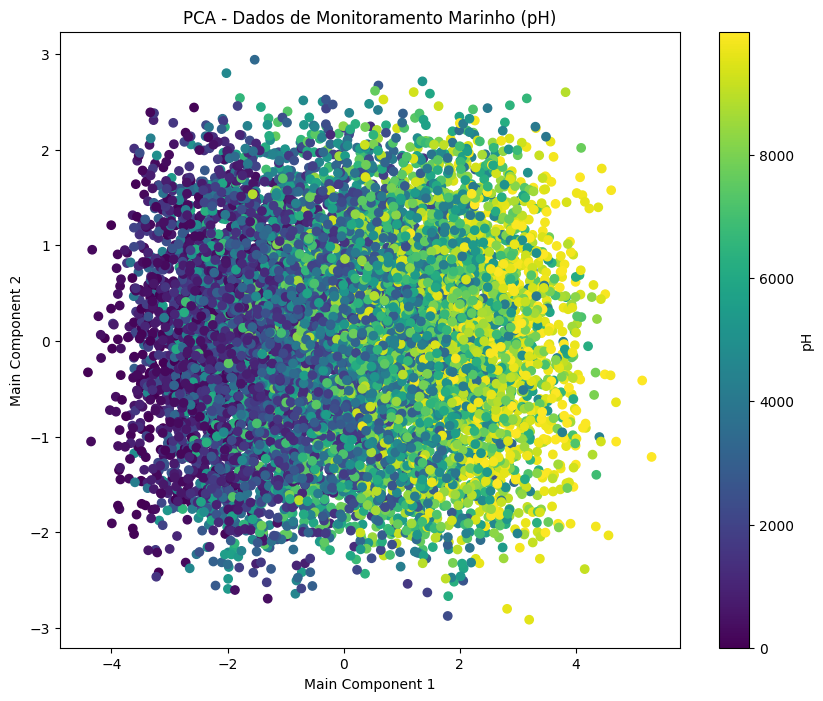

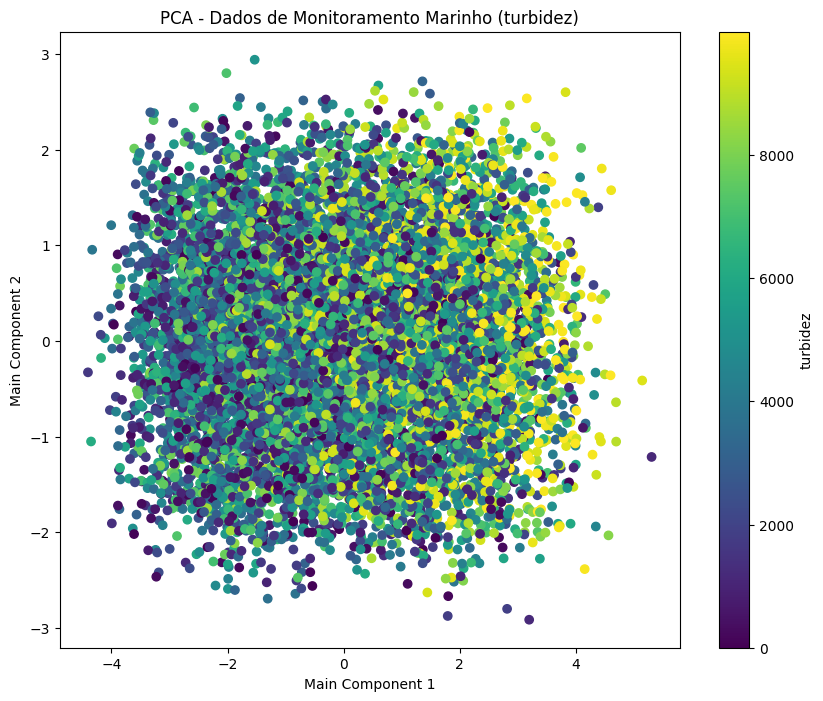

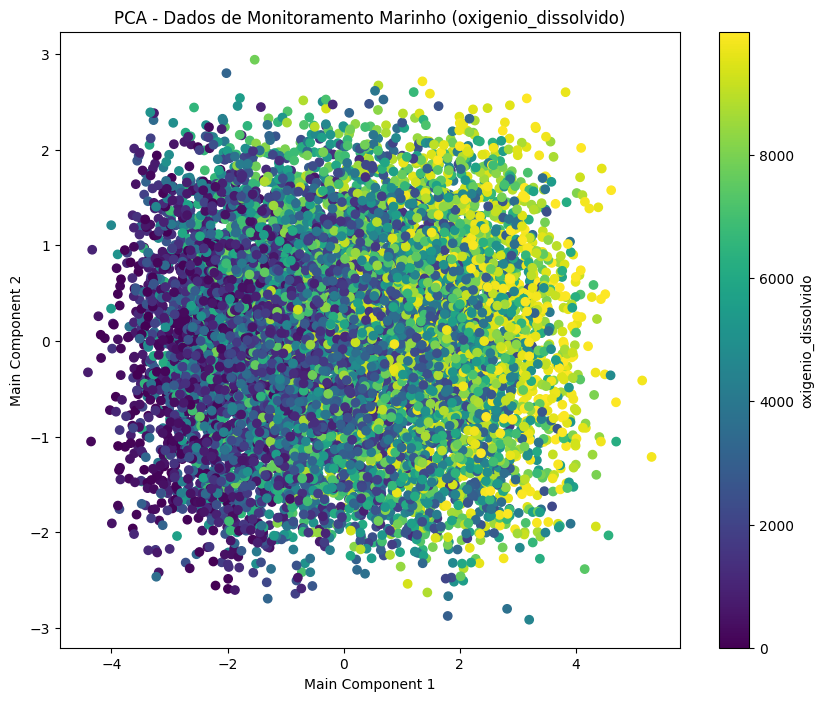

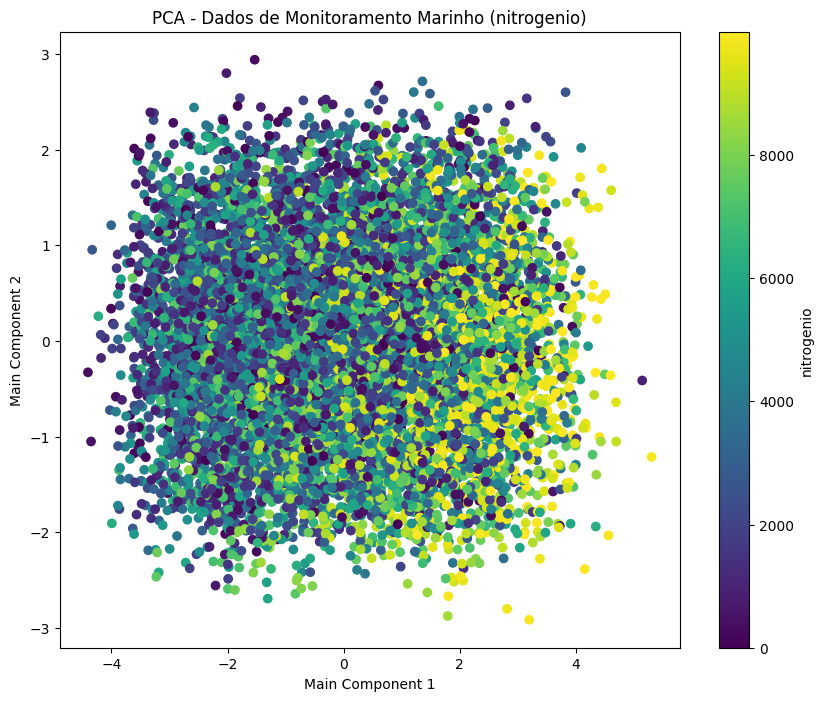

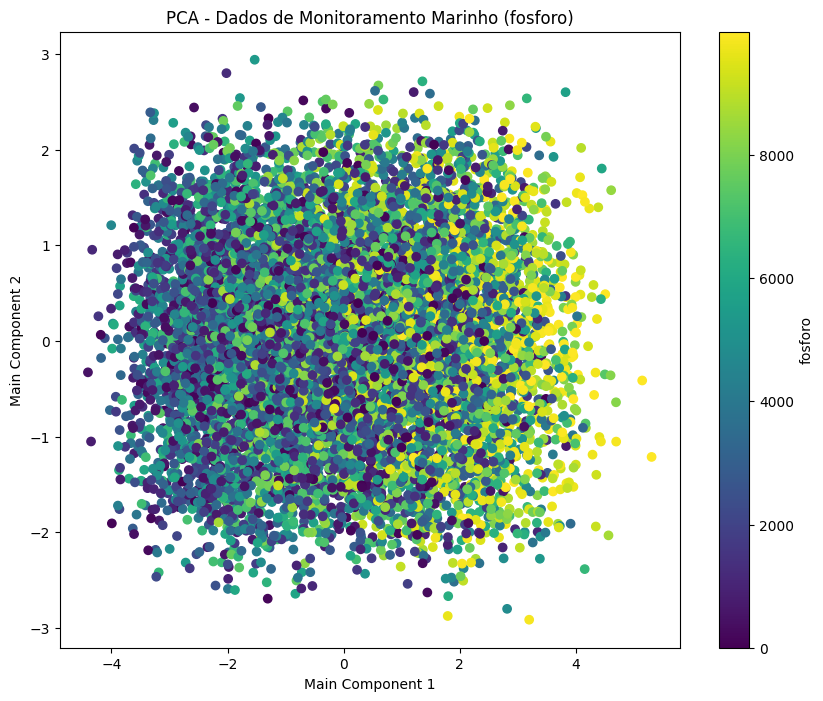

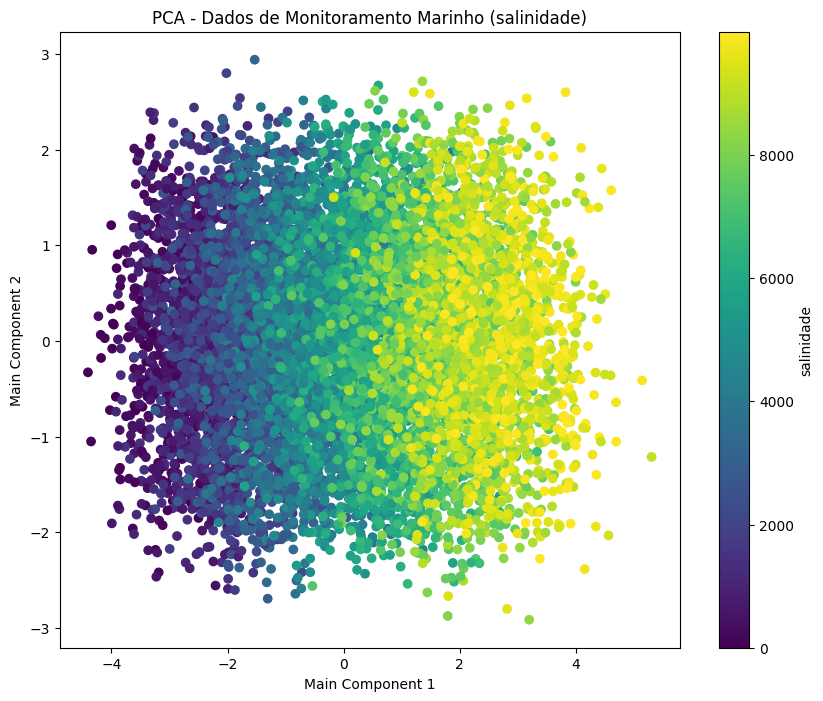

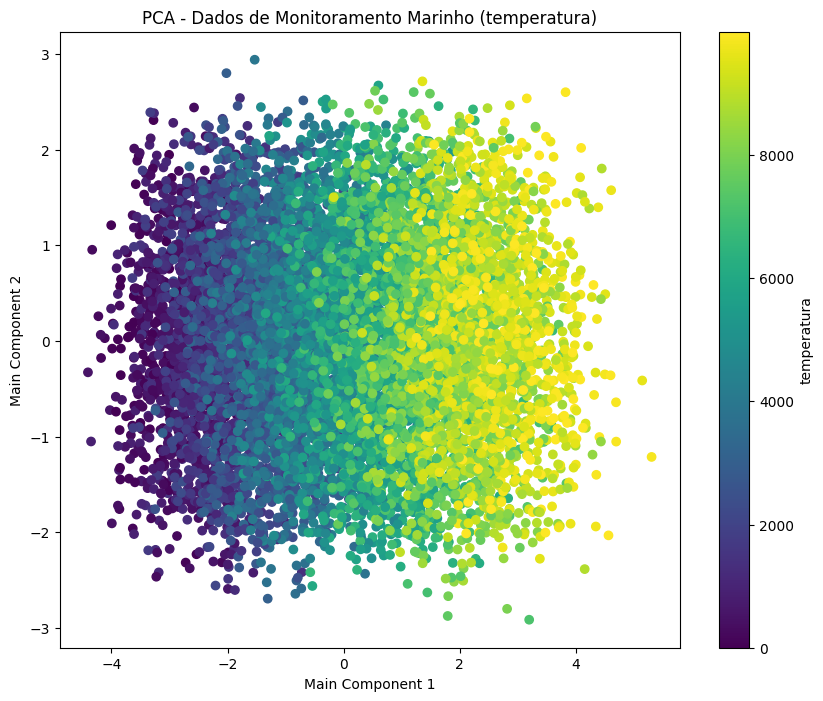

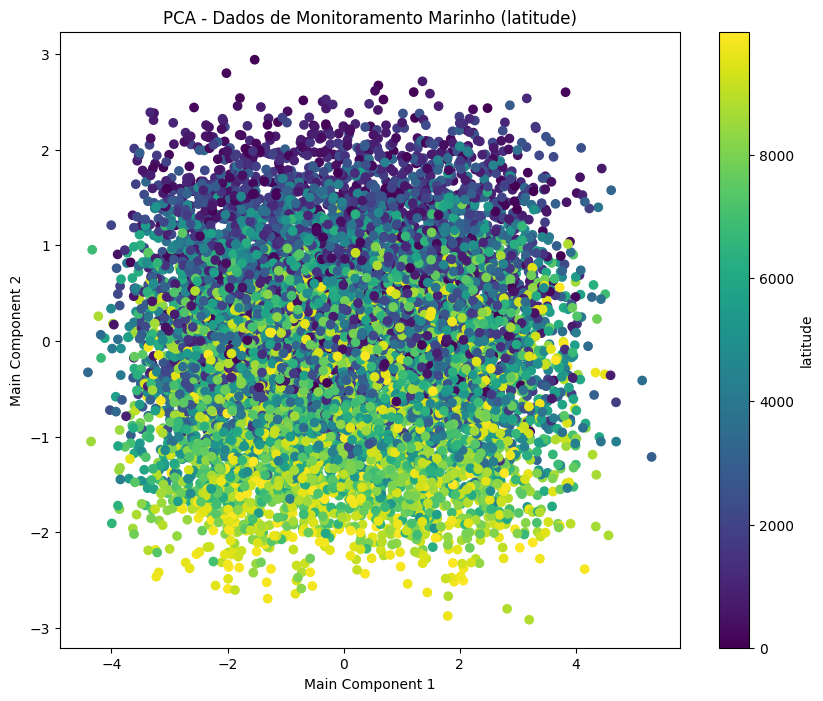

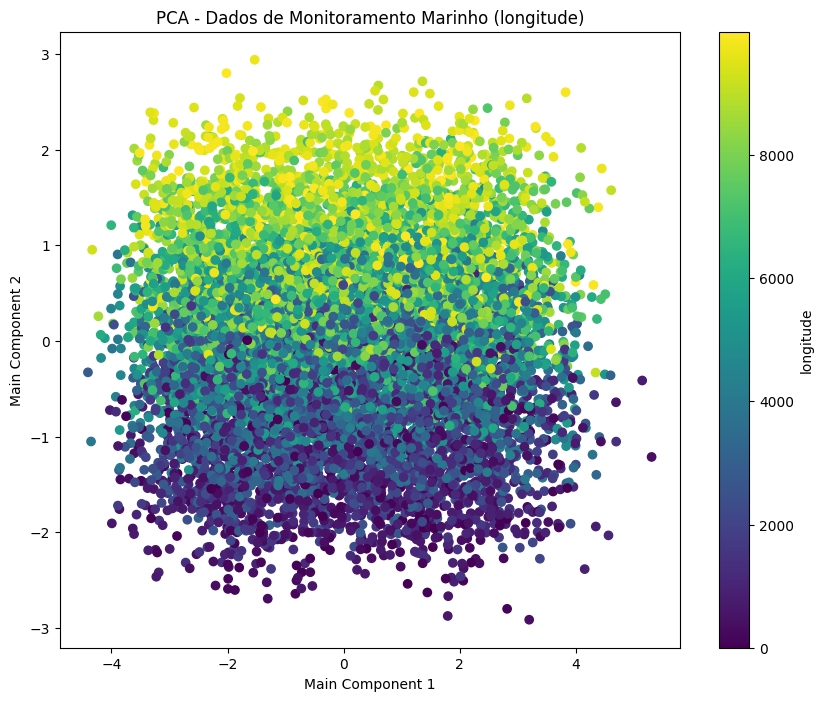

C:\Users\USER\AppData\Local\Temp\ipykernel_3040\2346372890.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = dict(zip(unique_values, plt.cm.get_cmap('tab10', len(unique_values)).colors))
C:\Users\USER\AppData\Local\Temp\ipykernel_3040\2346372890.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=colors, cmap='viridis')


ValueError: Image size of 810x209518 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 2 Axes>

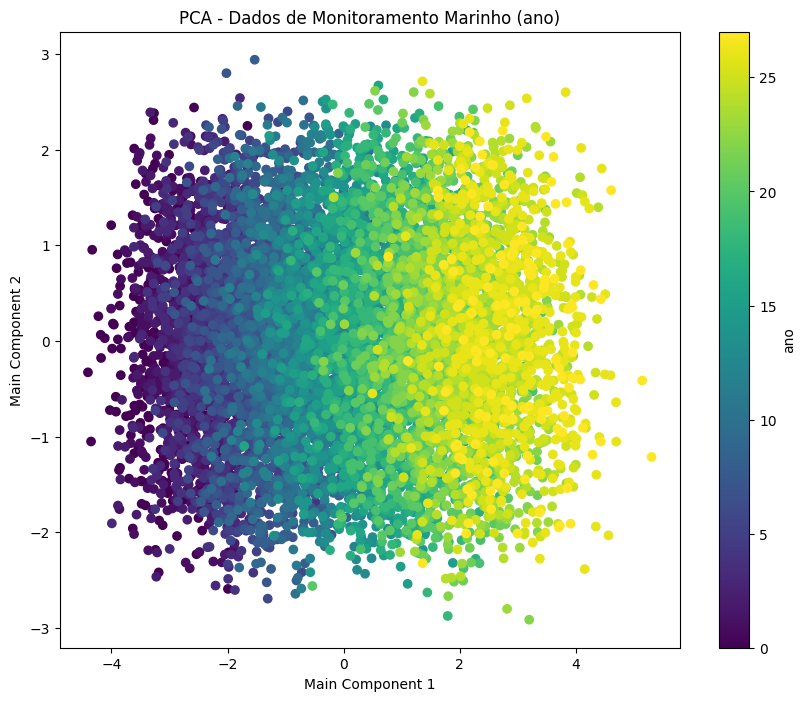

C:\Users\USER\AppData\Local\Temp\ipykernel_3040\2346372890.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = dict(zip(unique_values, plt.cm.get_cmap('tab10', len(unique_values)).colors))
C:\Users\USER\AppData\Local\Temp\ipykernel_3040\2346372890.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=colors, cmap='viridis')


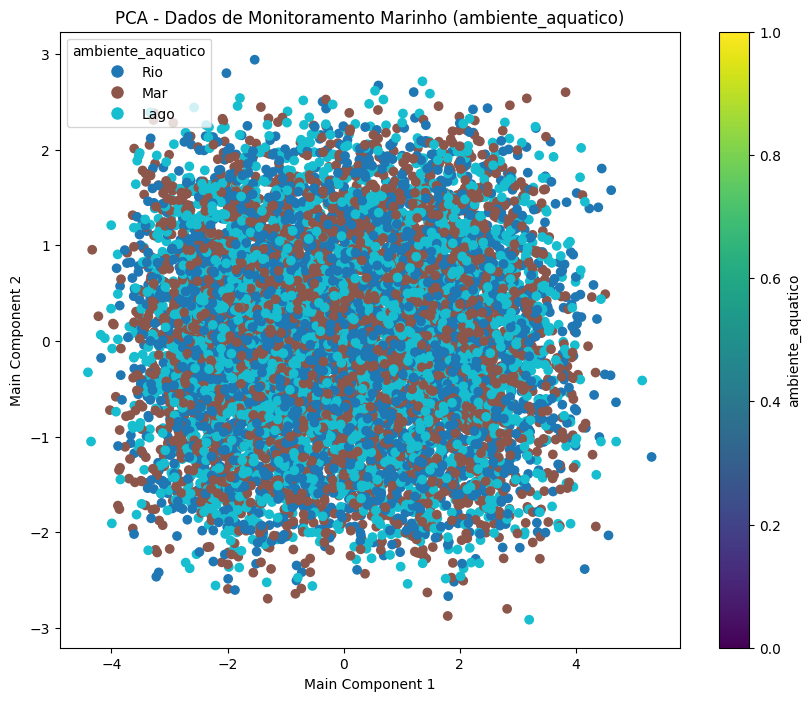

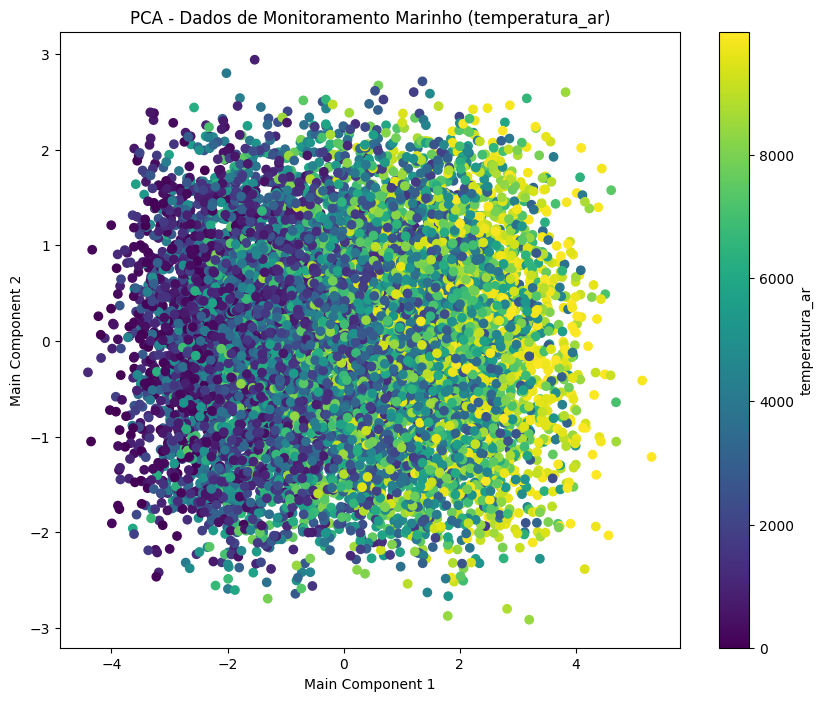

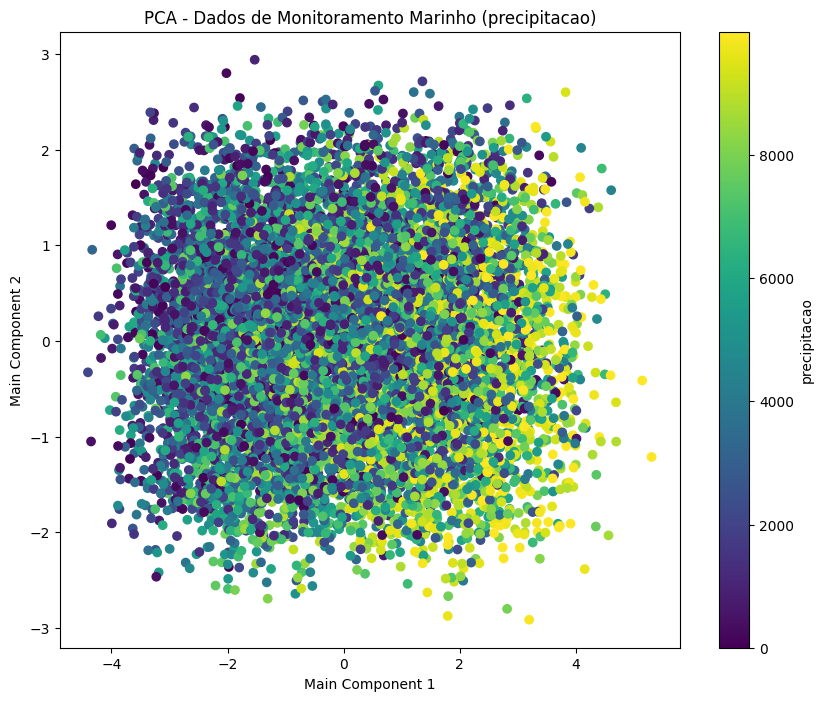

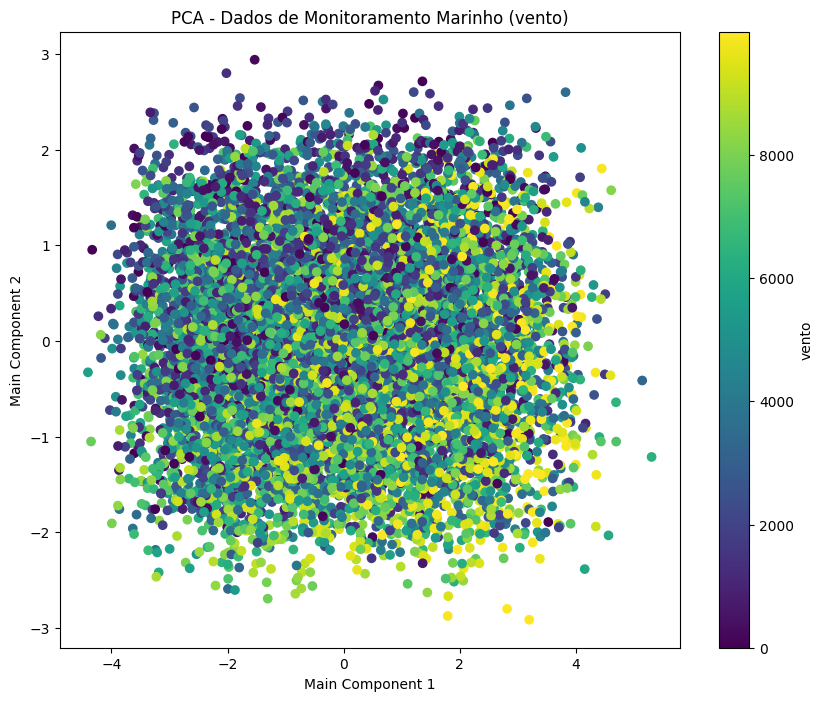

C:\Users\USER\AppData\Local\Temp\ipykernel_3040\2346372890.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = dict(zip(unique_values, plt.cm.get_cmap('tab10', len(unique_values)).colors))
C:\Users\USER\AppData\Local\Temp\ipykernel_3040\2346372890.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=colors, cmap='viridis')


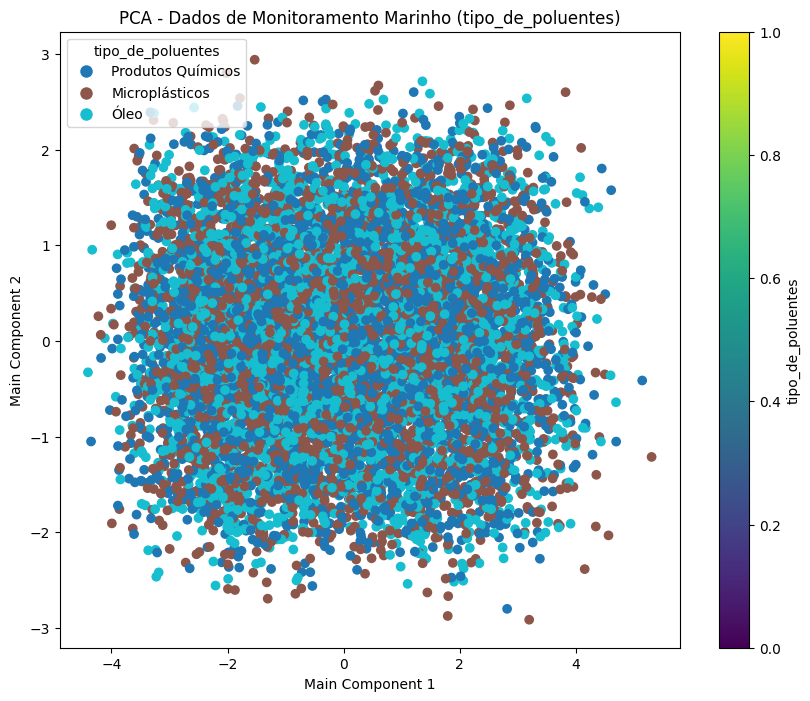

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

def perform_pca_and_visualize(df, features, color_column):
    # Padroniza os dados (importante para o PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # Inicializa o PCA e ajuste aos dados
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Cria um DataFrame para visualizar os resultados do PCA
    df_pca = pd.DataFrame(data=X_pca, columns=['Main Component 1', 'Main Component 2'])

    # Define o mapa de cores
    if df[color_column].dtype == 'object' or len(df[color_column].unique()) <= 10:  # Considera categóricas colunas com menos de 10 valores únicos
        unique_values = df[color_column].unique()
        color_map = dict(zip(unique_values, plt.cm.get_cmap('tab10', len(unique_values)).colors))
        colors = df[color_column].map(color_map)
        legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
                         for label, color in color_map.items()]
    else:
        colors = pd.Categorical(df[color_column]).codes
        legend_labels = None

    # Visualiza os resultados
    plt.figure(figsize=(10, 8))
    sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=colors, cmap='viridis')

    # Adicione uma barra de cores
    plt.colorbar(sc, label=color_column)

    # Adicione a legenda das cores, se aplicável
    if legend_labels:
        plt.legend(handles=legend_labels, title=color_column, loc='upper left')

    plt.xlabel('Main Component 1')
    plt.ylabel('Main Component 2')
    plt.title(f'PCA - Dados de Monitoramento Marinho ({color_column})')
    plt.show()

def main():
    # Carrega o conjunto de dados "dados_monitoramento_marinho.csv"
    df = pd.read_csv('Dados Monitoramento De Poluentes Marinho.csv')

    # Seleciona as características para aplicar o PCA
    features = ['pH', 'turbidez', 'oxigenio_dissolvido', 'nitrogenio', 'fosforo', 'salinidade', 'temperatura', 
                'latitude', 'longitude', 'temperatura_ar', 'precipitacao', 'vento']

    # Execute PCA e visualiza os resultados para todas as colunas do DataFrame
    columns_to_visualize = df.columns.tolist()

    for column in columns_to_visualize:
        perform_pca_and_visualize(df, features, column)

if __name__ == "__main__":
    main()

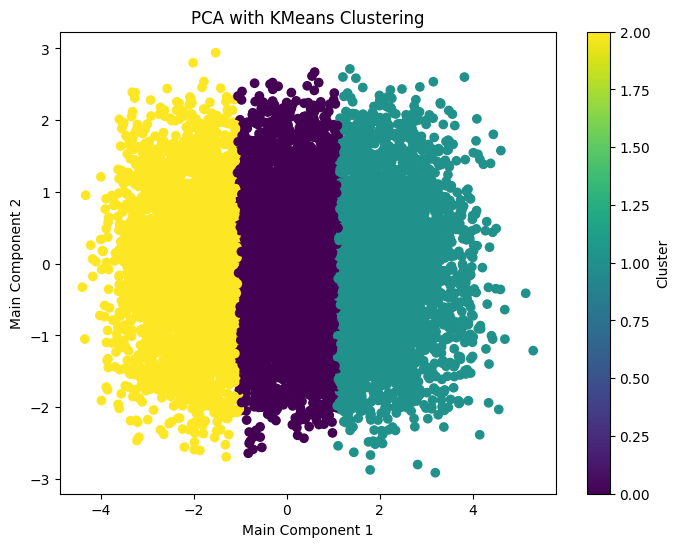

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def perform_pca_and_visualize(df, features):
    # Padroniza os dados (importante para o PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # Inicializa o PCA e ajuste aos dados
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Aplique o KMeans diretamente nos dados reduzidos
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_pca)

    # Cria um DataFrame para visualizar os resultados do PCA e dos clusters
    df_pca = pd.DataFrame(data=X_pca, columns=['Main Component 1', 'Main Component 2'])
    df_pca['Cluster'] = clusters

    # Visualiza os resultados
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=clusters, cmap='viridis')

    # Adicione uma barra de cores
    plt.colorbar(sc, label='Cluster')

    plt.xlabel('Main Component 1')
    plt.ylabel('Main Component 2')
    plt.title('PCA with KMeans Clustering')
    plt.show()

# Modify the main function
def main():
    # Carrega o conjunto de dados "dados_monitoramento_marinho.csv"
    df = pd.read_csv('Dados Monitoramento De Poluentes Marinho.csv')

    # Seleciona as características para aplicar o PCA
    features = ['pH', 'turbidez', 'oxigenio_dissolvido', 'nitrogenio', 'fosforo', 'salinidade', 'temperatura', 
                'latitude', 'longitude', 'temperatura_ar', 'precipitacao', 'vento']

    # Execute PCA e visualiza os resultados
    perform_pca_and_visualize(df, features)

if __name__ == "__main__":
    main()


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Carregando os dados do CSV em um DataFrame
df = pd.read_csv('Dados Monitoramento De Poluentes Marinho.csv')

# Variáveis independentes
X = df.drop(columns=['temperatura', 'data_hora']) 

# Variável dependente
y = df['temperatura']

# Definindo colunas categóricas
categorical_cols = ['ambiente_aquatico', 'tipo_de_poluentes']

# Criando um pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Adicionando o modelo de regressão linear ao pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Fazendo previsões
y_pred = pipeline.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Mean Squared Error):", mse)
print("R2 Score:", r2)


MSE (Mean Squared Error): 0.5457483989290328
R2 Score: 0.9223610496725472


In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error

In [63]:
# Carregar os dados
dados = pd.read_csv('Dados Monitoramento De Poluentes Marinho.csv')

# Converter a coluna 'data_hora' para o tipo datetime
dados['data_hora'] = pd.to_datetime(dados['data_hora'])

# Extrair o ano da coluna 'data_hora'
dados['ano'] = dados['data_hora'].dt.year

# Selecionar apenas as colunas numéricas para calcular as médias
colunas_numericas = ['pH', 'turbidez', 'oxigenio_dissolvido', 'nitrogenio', 'fosforo', 'salinidade', 'temperatura']
dados_numericos = dados[['ano'] + colunas_numericas]

# Calcular a média dos valores de cada parâmetro para cada ano
media_por_ano = dados_numericos.groupby('ano').mean().reset_index()

In [64]:
# Normalizar o ano para usar como feature para cada parâmetro
scaler_ano = StandardScaler()
ano_scaled = scaler_ano.fit_transform(media_por_ano[['ano']])

# Lista de parâmetros para prever
parametros = colunas_numericas

# Dicionário para armazenar os modelos treinados
modelos = {}

# Treinar um modelo para cada parâmetro
for parametro in parametros:
    # Normalizar o parâmetro para usar como feature
    scaler_parametro = StandardScaler()
    parametro_scaled = scaler_parametro.fit_transform(media_por_ano[[parametro]])
    
    # Treinar o modelo de regressão linear com o ano como feature
    modelo = LinearRegression()
    modelo.fit(ano_scaled, media_por_ano[parametro])
    
    # Armazenar o modelo treinado
    modelos[parametro] = (modelo, scaler_ano, scaler_parametro)

In [65]:
# Exibir os scores de validação cruzada médios em forma de porcentagem para cada parâmetro
for parametro, score in scores.items():
    score_percent = score.mean() * 100
    print(f'Score de validação cruzada médio para {parametro}: {score_percent:.2f}%')


Score de validação cruzada médio para pH: 99.16%
Score de validação cruzada médio para turbidez: 91.20%
Score de validação cruzada médio para oxigenio_dissolvido: 95.16%
Score de validação cruzada médio para nitrogenio: 95.87%
Score de validação cruzada médio para fosforo: 90.05%
Score de validação cruzada médio para salinidade: 99.92%
Score de validação cruzada médio para temperatura: 99.88%


In [66]:
# Exibir o MSE para cada parâmetro
for parametro, mse in mse_scores.items():
    print(f'MSE para {parametro}: {mse:.2f}')

MSE para pH: 0.00
MSE para turbidez: 0.01
MSE para oxigenio_dissolvido: 0.00
MSE para nitrogenio: 0.00
MSE para fosforo: 0.00
MSE para salinidade: 0.00
MSE para temperatura: 0.00


In [67]:
# Ano de previsão
ano_previsao = 2050

# Prever os níveis de cada parâmetro em 2050
for parametro in parametros:
    modelo, scaler_ano, scaler_parametro = modelos[parametro]
    ano_previsao_scaled = scaler_ano.transform([[ano_previsao]])
    parametro_previsto = modelo.predict(ano_previsao_scaled)
    print(f'Nível de {parametro} previsto para 2050: {parametro_previsto[0]}')


Nível de pH previsto para 2050: 9.70979623737274
Nível de turbidez previsto para 2050: 7.84639142617184
Nível de oxigenio_dissolvido previsto para 2050: 9.783007212064822
Nível de nitrogenio previsto para 2050: 1.96961168325588
Nível de fosforo previsto para 2050: 0.24153346504676707
Nível de salinidade previsto para 2050: 62.01890045934327
Nível de temperatura previsto para 2050: 48.17501792461327


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler wa

In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error


# Carregar os dados
dados = pd.read_csv('Dados Monitoramento De Poluentes Marinho.csv')

# Converter a coluna 'data_hora' para o tipo datetime
dados['data_hora'] = pd.to_datetime(dados['data_hora'])

# Extrair o ano da coluna 'data_hora'
dados['ano'] = dados['data_hora'].dt.year

# Selecionar apenas as colunas numéricas para calcular as médias
colunas_numericas = ['pH', 'turbidez', 'oxigenio_dissolvido', 'nitrogenio', 'fosforo', 'salinidade', 'temperatura']
dados_numericos = dados[['ano'] + colunas_numericas]

# Calcular a média dos valores de cada parâmetro para cada ano
media_por_ano = dados_numericos.groupby('ano').mean().reset_index()

# Normalizar o ano para usar como feature para cada parâmetro
scaler_ano = StandardScaler()
ano_scaled = scaler_ano.fit_transform(media_por_ano[['ano']])

# Lista de parâmetros para prever
parametros = colunas_numericas

# Dicionário para armazenar os modelos treinados
modelos = {}

# Treinar um modelo para cada parâmetro
for parametro in parametros:
    # Normalizar o parâmetro para usar como feature
    scaler_parametro = StandardScaler()
    parametro_scaled = scaler_parametro.fit_transform(media_por_ano[[parametro]])
    
    # Treinar o modelo de regressão linear com o ano como feature
    modelo = LinearRegression()
    modelo.fit(ano_scaled, media_por_ano[parametro])
    
    # Armazenar o modelo treinado
    modelos[parametro] = (modelo, scaler_ano, scaler_parametro)

# Lista para armazenar os scores de validação cruzada para cada parâmetro
scores = {}
mse_scores = {}

# Realizar validação cruzada para cada parâmetro
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for parametro in parametros:
    modelo, scaler_ano, scaler_parametro = modelos[parametro]
    score = cross_val_score(modelo, ano_scaled, media_por_ano[parametro], cv=kf)
    scores[parametro] = score
    
    # Calculando o MSE
    y_pred = cross_val_predict(modelo, ano_scaled, media_por_ano[parametro], cv=kf)
    mse = mean_squared_error(media_por_ano[parametro], y_pred)
    mse_scores[parametro] = mse

# Exibir os scores de validação cruzada médios em forma de porcentagem para cada parâmetro
for parametro, score in scores.items():
    score_percent = score.mean() * 100
    print(f'Score de validação cruzada médio para {parametro}: {score_percent:.2f}%')

# Exibir o MSE para cada parâmetro
for parametro, mse in mse_scores.items():
    print(f'MSE para {parametro}: {mse:.2f}')


# Ano de previsão
ano_previsao = 2050

# Prever os níveis de cada parâmetro em 2050
for parametro in parametros:
    modelo, scaler_ano, scaler_parametro = modelos[parametro]
    ano_previsao_scaled = scaler_ano.transform([[ano_previsao]])
    parametro_previsto = modelo.predict(ano_previsao_scaled)
    print(f'Nível de {parametro} previsto para 2050: {parametro_previsto[0]}')


Score de validação cruzada médio para pH: 99.16%
Score de validação cruzada médio para turbidez: 91.20%
Score de validação cruzada médio para oxigenio_dissolvido: 95.16%
Score de validação cruzada médio para nitrogenio: 95.87%
Score de validação cruzada médio para fosforo: 90.05%
Score de validação cruzada médio para salinidade: 99.92%
Score de validação cruzada médio para temperatura: 99.88%
MSE para pH: 0.00
MSE para turbidez: 0.01
MSE para oxigenio_dissolvido: 0.00
MSE para nitrogenio: 0.00
MSE para fosforo: 0.00
MSE para salinidade: 0.00
MSE para temperatura: 0.00
Nível de pH previsto para 2050: 9.70979623737274
Nível de turbidez previsto para 2050: 7.84639142617184
Nível de oxigenio_dissolvido previsto para 2050: 9.783007212064822
Nível de nitrogenio previsto para 2050: 1.96961168325588
Nível de fosforo previsto para 2050: 0.24153346504676707
Nível de salinidade previsto para 2050: 62.01890045934327
Nível de temperatura previsto para 2050: 48.17501792461327


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler wa